# Insurance Claims- Fraud Detection

**Problem Statement:**
    
**Business case:**
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are total 1000 rows and 40 columns in the dataset. Also, it containss both categorical and numeric data.

In [5]:
# Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 is going blank in all columns, so we need to drop them.

In [6]:
# Dropping _c39 column
df.drop("_c39",axis=1,inplace=True)

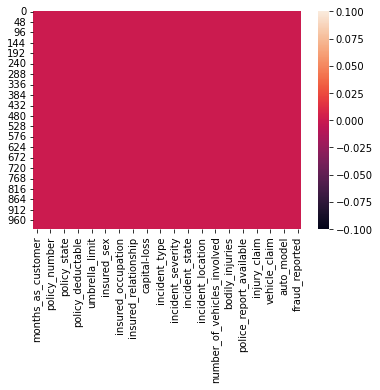

In [7]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())
plt.show()

Now there is no null value present in the dataset.

In [8]:
# Checking number of unique values in each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

We can observe the columns policy_number and incident_location have 1000,995 unique values. So we can drop them as it is not required for our analysis.

In [9]:
# Dropping policy_number and incident_location columns
df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)
df.drop("insured_zip",axis=1,inplace=True)
df.drop("policy_bind_date",axis=1,inplace=True)
df.drop("policy_csl",axis=1,inplace=True)
df.drop("incident_date",axis=1,inplace=True)

In [10]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*40)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
****************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
****************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
****************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
****************************************
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
*******************************

From the value counts we can observe that umbrella_limit, capital-gains and capital-loss contains zero values. 
Since the umbrella_limit columns more zero values, let's drop the same.

In [11]:
# Dropping umbrella_limit column
df.drop("umbrella_limit",axis=1,inplace=True)

Also, we can observe some columns have "?" values, we need to fill them.

In [12]:
# Checking which columns contains "?" sign
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [13]:
# Checking mode of the above columns
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [14]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium insured_sex insured_education_level  \
0                1406.91        MALE                      MD   
1                1197.22        MALE                      MD   
2                1413.14      FEMALE                     PhD   
3                1415.74      FEMALE                     PhD   
4                1583.91        MALE               Associate   

  insured_occupation insured_hobbies  ... witnesses  police_report_available  \
0       craft-repair        sleeping  ...         2                      YES   
1  machine-op-inspct         reading  ...         0                       NO   
2              sales     board-games  ...         3                       NO   
3       armed-forces     board-games  ...         2                       NO   
4              sales     board-games  ...         1                       NO   

   total_claim_amount injury_claim property_claim vehicle_claim  auto_make  \
0               71610         6510          13020         52080       Saab   
1                5070          780            780          3510   Mercedes   
2               34650         7700           3850         23100      Dodge   
3               63400         6340           6340         50720  Chevrolet   
4                6500         1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 34 columns]

# EDA

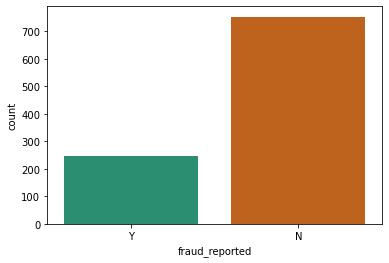

In [15]:
#Visualizing how many insurance claims is fraudulent
sns.countplot(df["fraud_reported"],palette="Dark2")
plt.show()

From the plot we can observe that the count of "N" is high compared to "Y". Which means most of the insurance claims have not reported as fradulent.

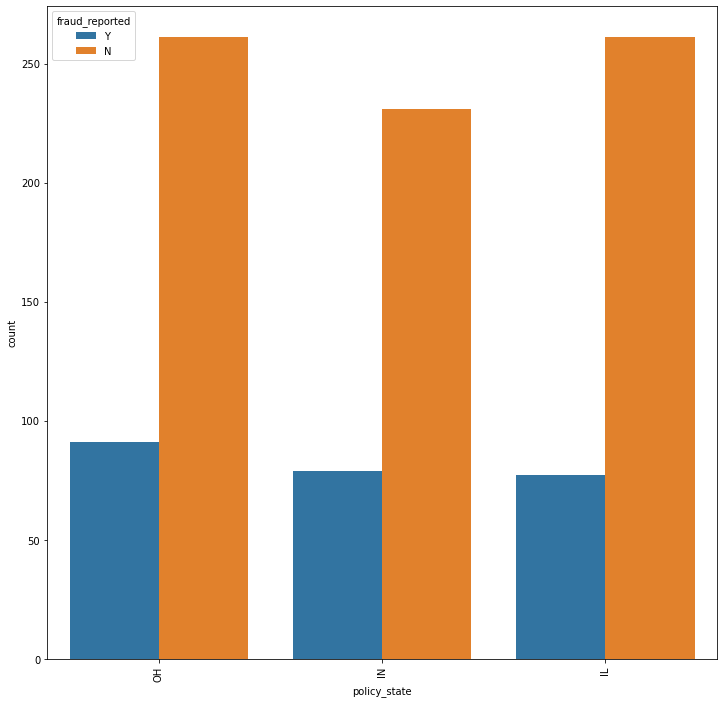

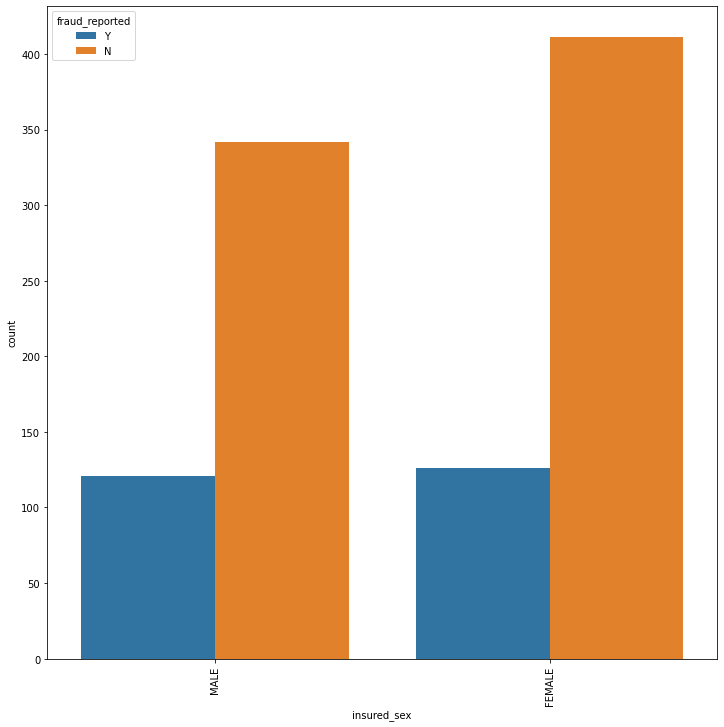

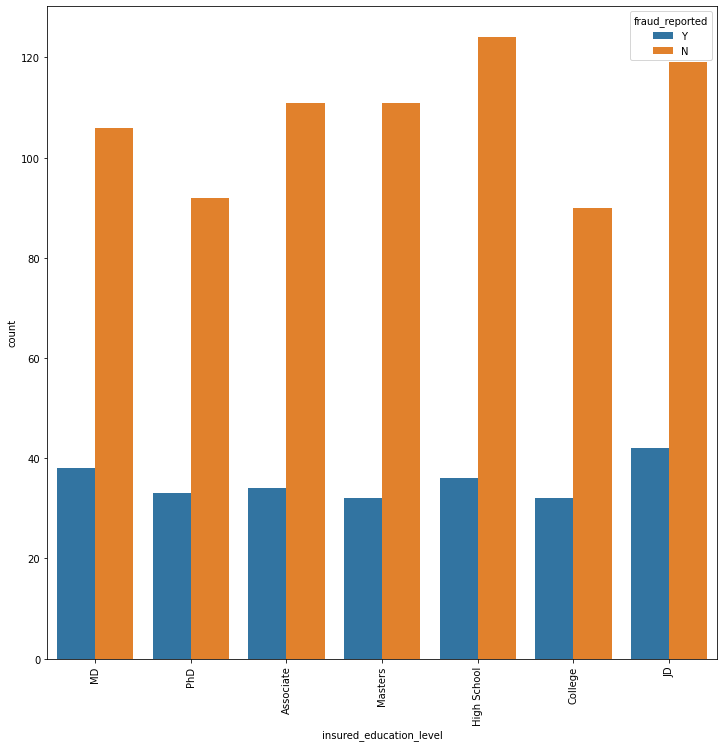

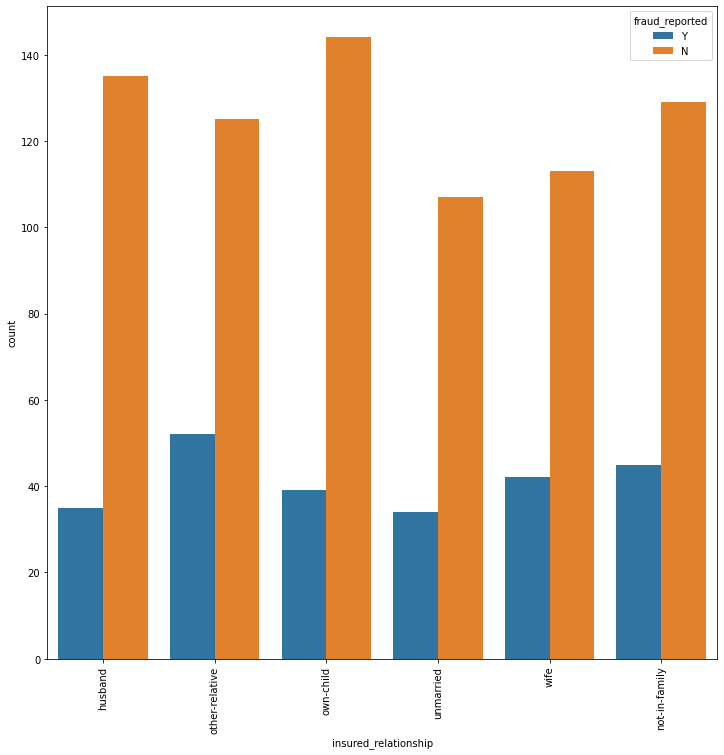

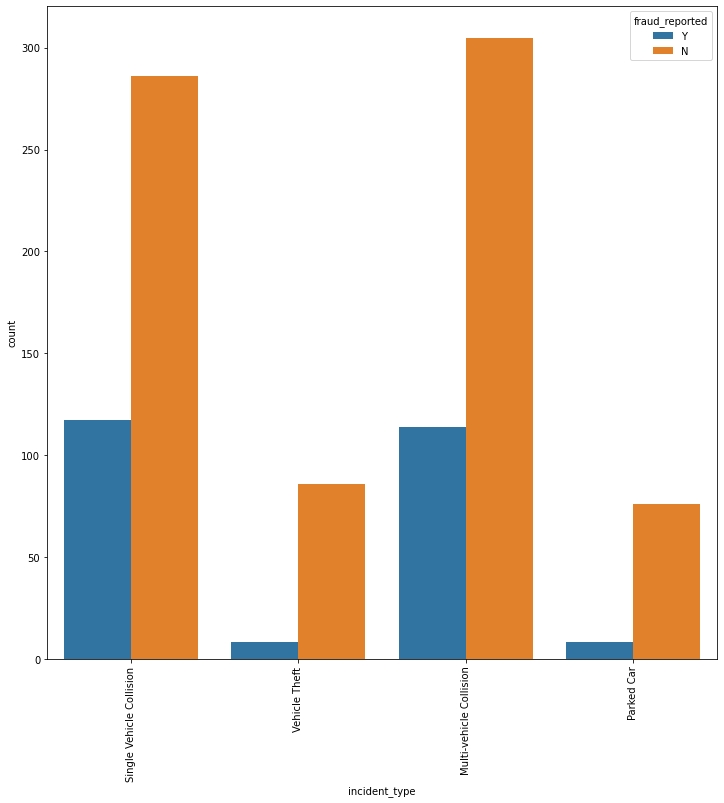

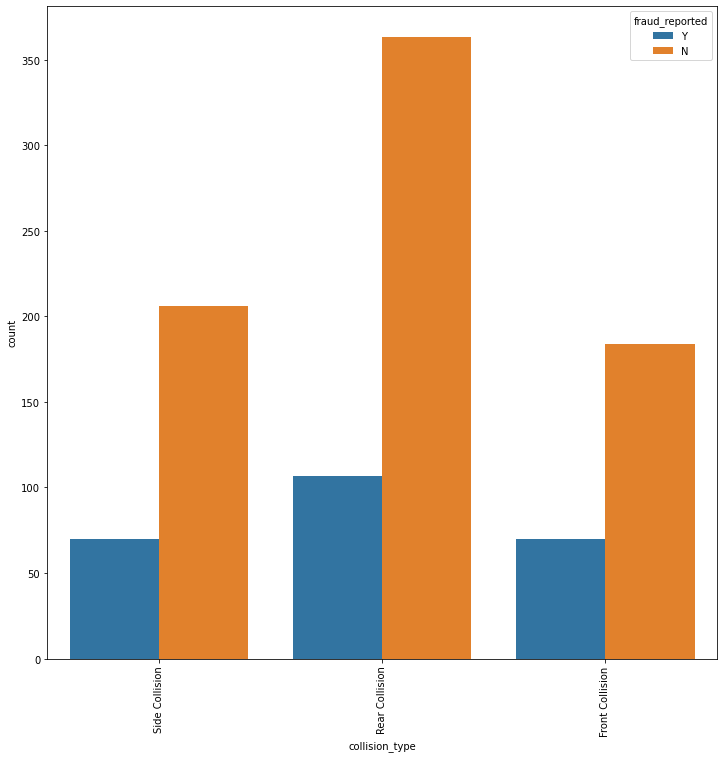

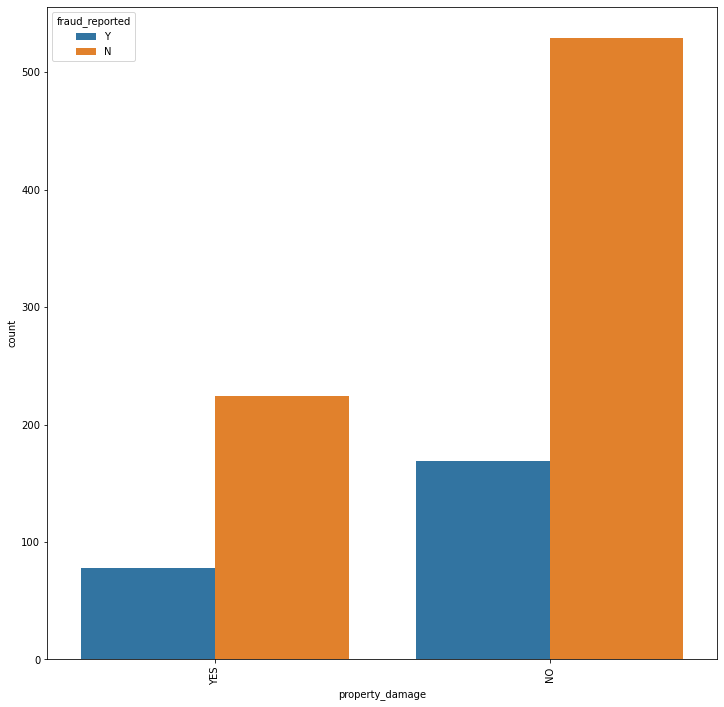

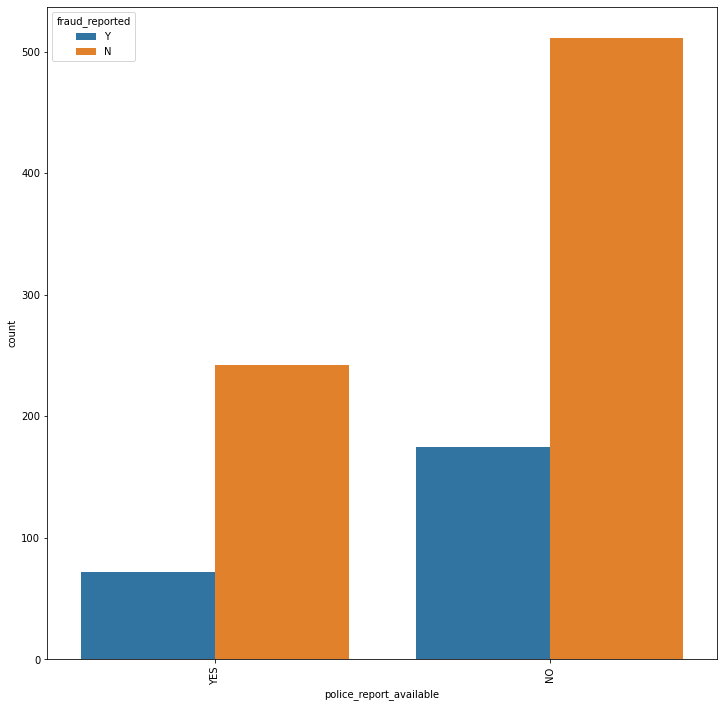

In [16]:
# Now checking for numerical columns
k=['policy_state', 'insured_sex', 'insured_education_level','insured_relationship', 'incident_type','collision_type','property_damage','police_report_available']


for m in k:
    plt.figure(figsize=(12,12))
    sns.countplot(x=m,hue='fraud_reported',data=df)
    plt.xticks(rotation=90)
    plt.show()

* The types of the policies claimed by the customers are almost same - still the policy state type OH has bit high counts and the type IL has bit less count.
* Both male and female have insurance but the count for Female is little higher than Male counts.
* The count is pretty much same for all the education level but still the people who have completed their college,masters and PhD have less count compared to others.
* While looking at the incident type, Multi-vehicle collision and Single Vehicle Collision are pretty much similar. But the count is very less for Parked car and Vehicle Theft.
* The collision type, the count is high for Rear collision and the other two types have almost equal counts.
* More than half of the people did not face any property damage.
* More than half of the people were produced the police reports.

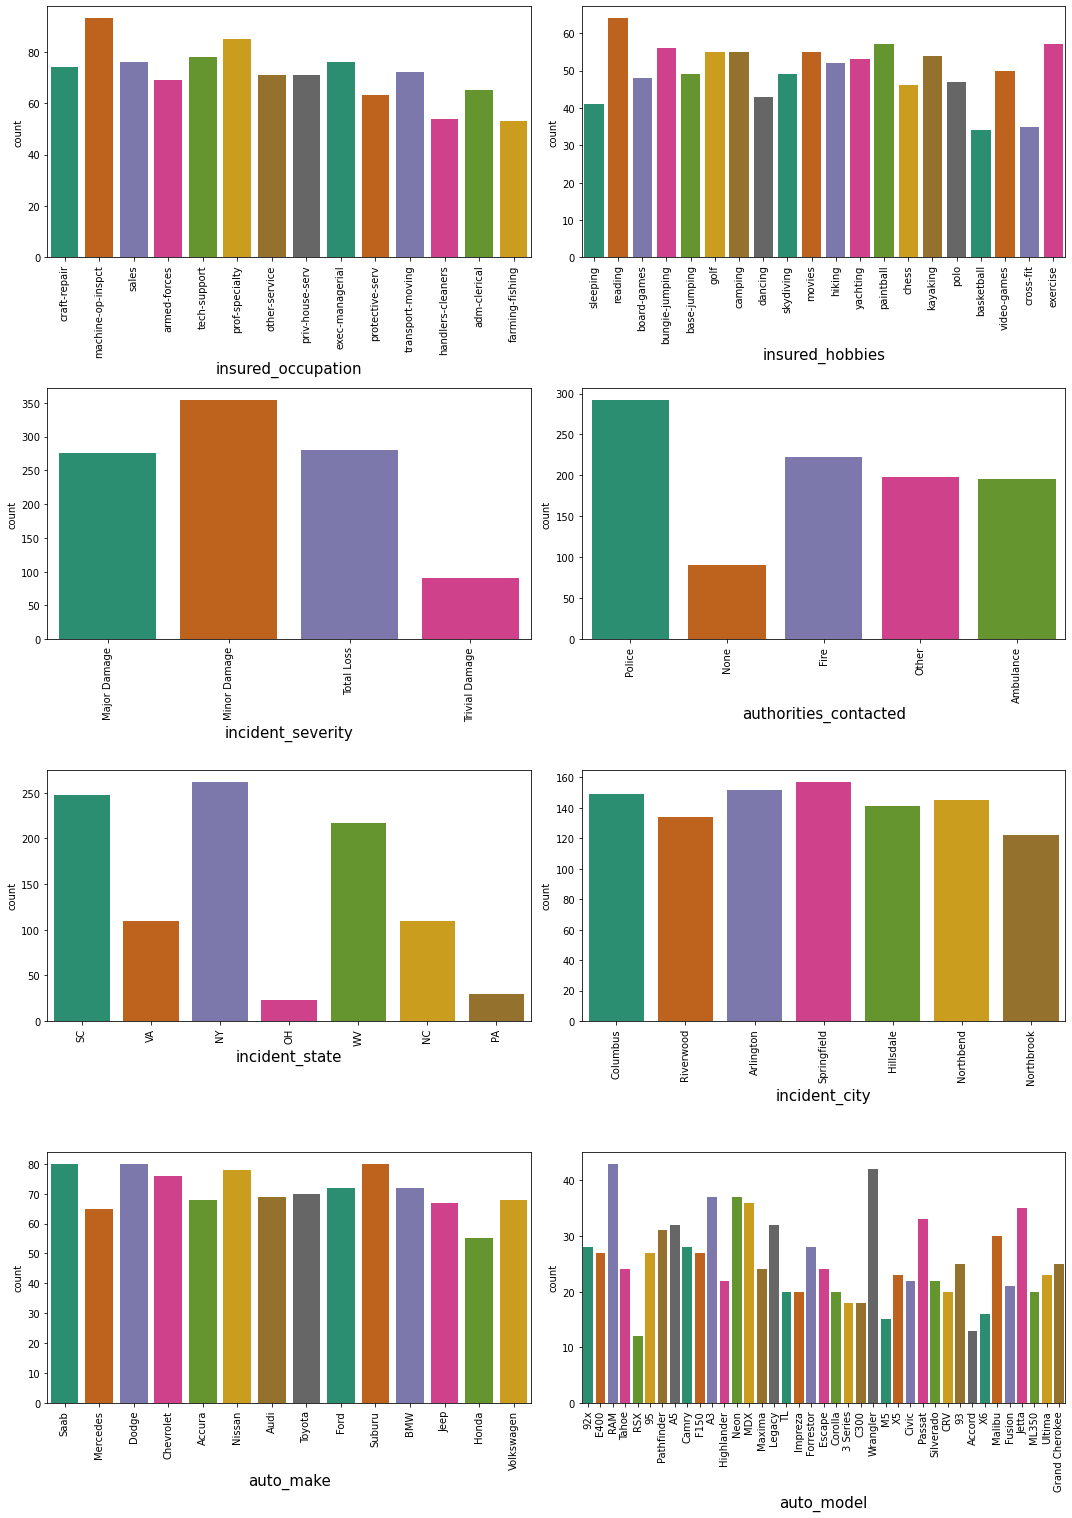

In [17]:
cols2 = ['insured_occupation', 'insured_hobbies', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city','auto_make', 'auto_model']

plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in cols2:
    if plotnumber:
        ax=plt.subplot(5,2,plotnumber)
        sns.countplot(df[column],palette="Dark2")
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In insured occupation, most of the data is covered by machine operation inspector followed by professional speciality.

In insured hobbies, we can see reading holds the highest data followed by exercise.

The incident severity count is high for Minor damages and trivial damage data has very less count compared to others.

Most of the authorities contact police and Fire having the second highest count.

With respect to the incident state, New York, South Carolina and West Virginia states have highest counts.

In incident city, almost all categories have similar counts.

with respect to automobile companies, the categories Saab, Suburu, Dodge, Nissan and Volkswagen have high count.

With respect to vehicle models RAM and Wrangler have high count.

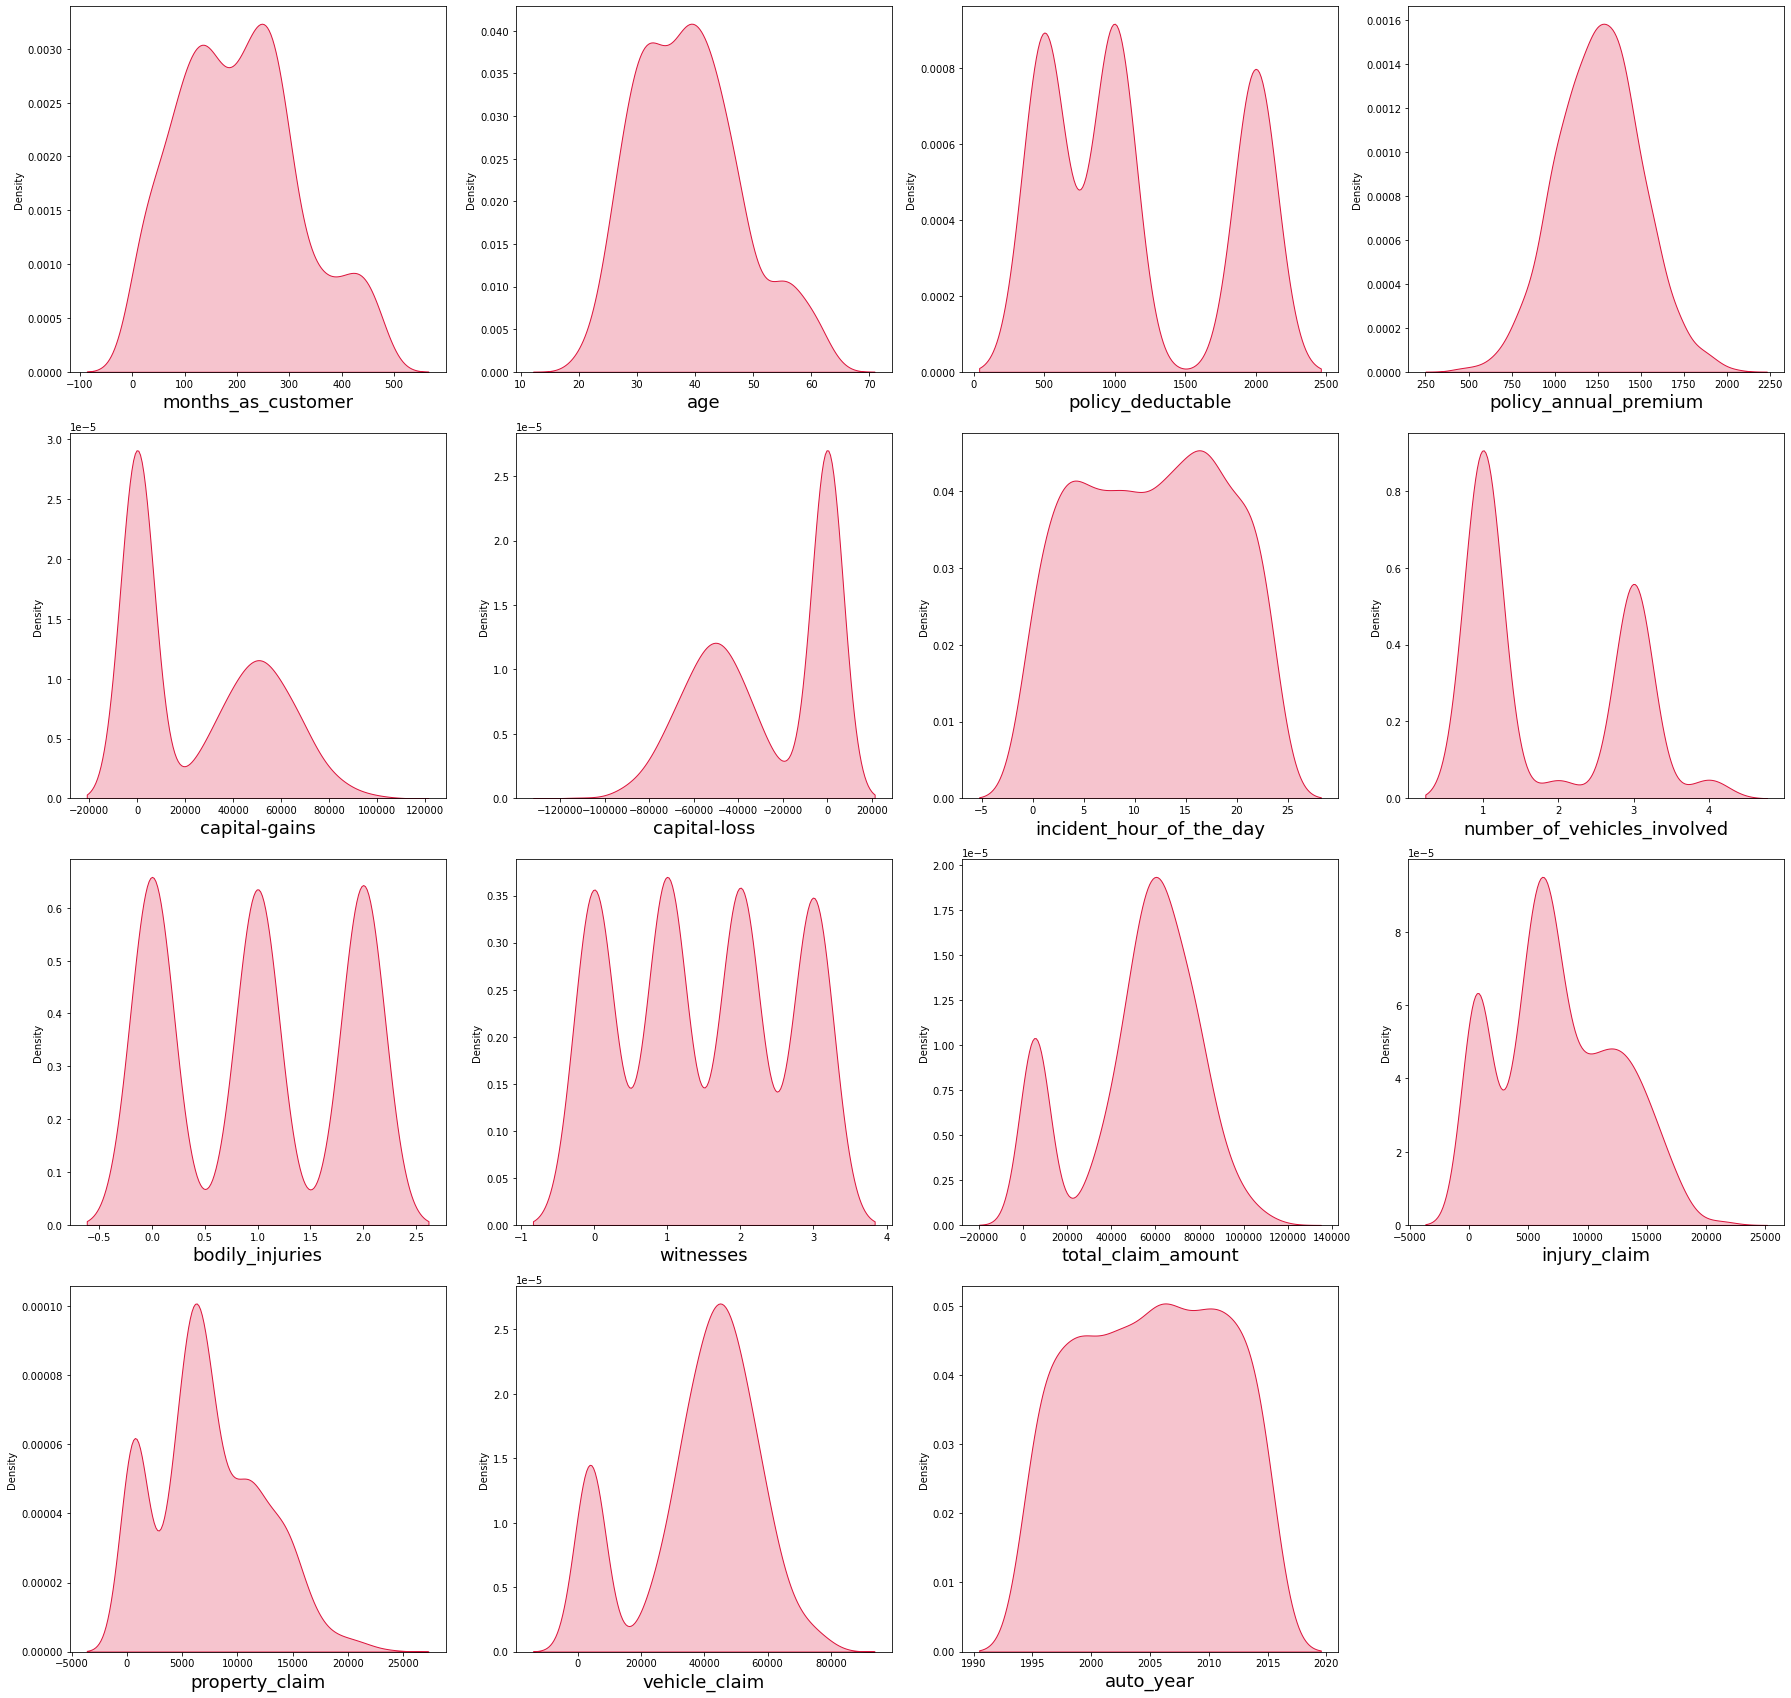

In [18]:
# Now checking for numerical columns
n=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        n.append(i)

        
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in n:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="crimson",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()        

The data in capital gains is skewed right.
The data in capital loss is skewed left.

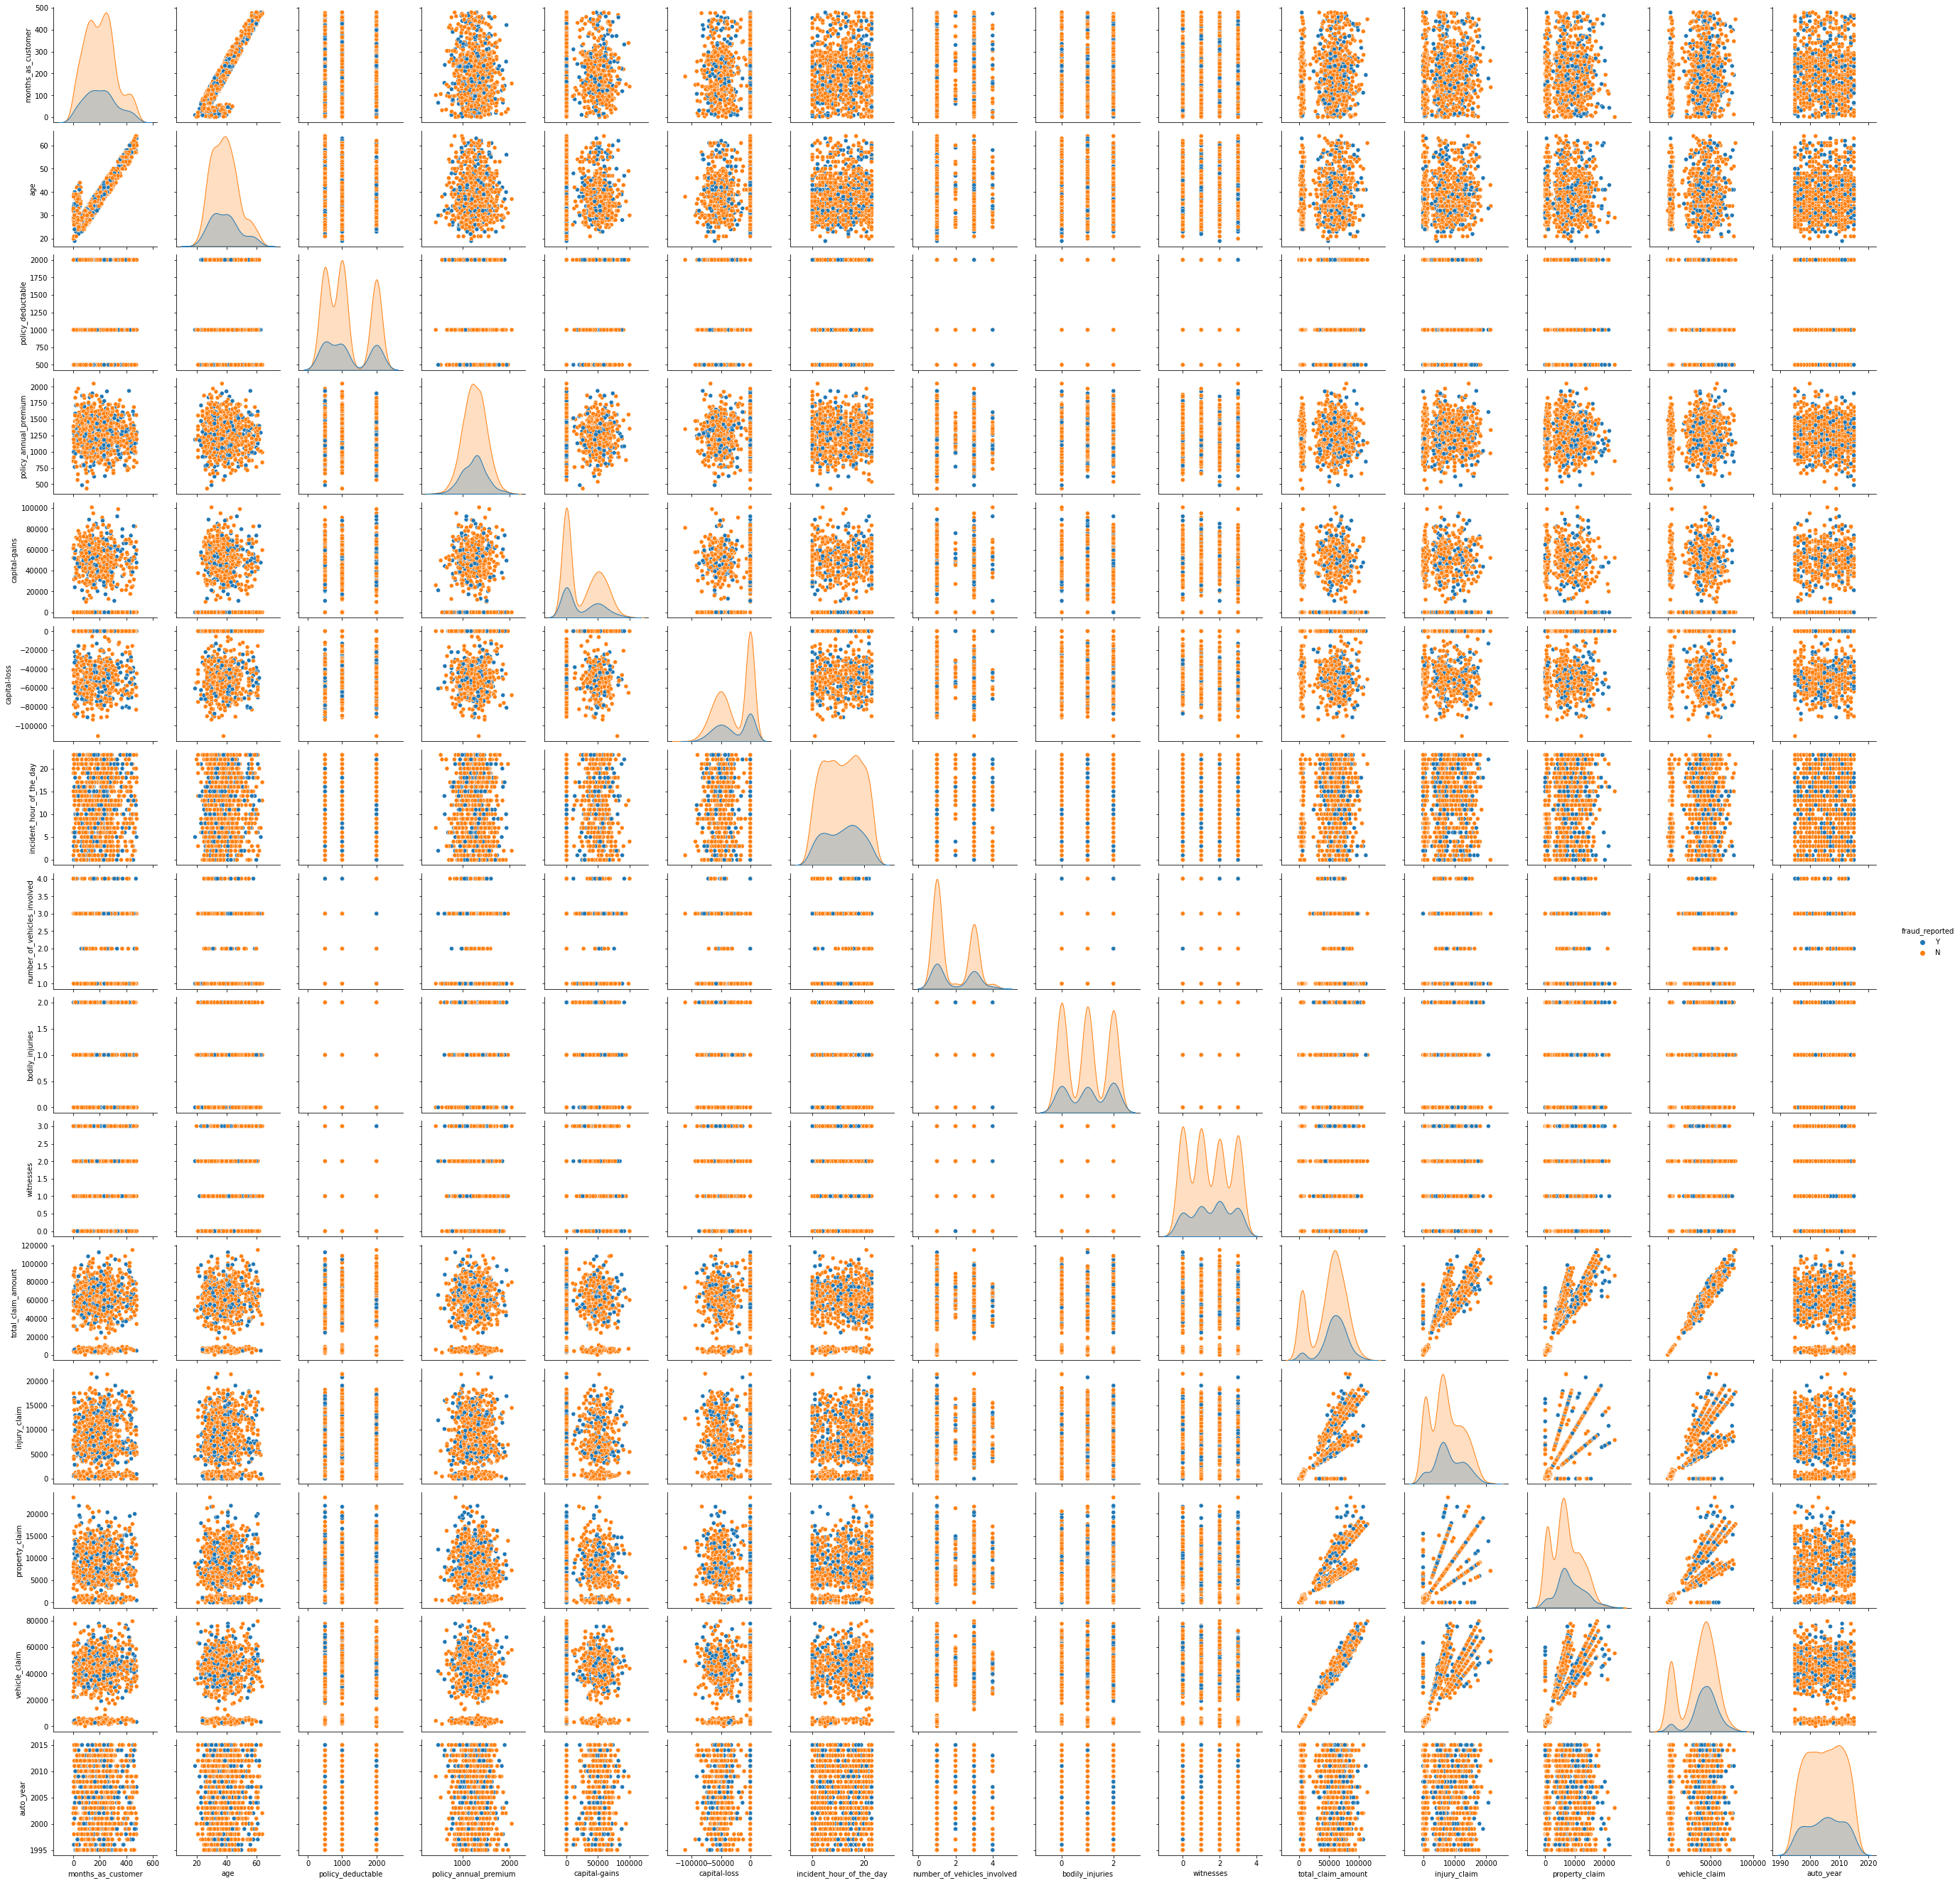

In [19]:
sns.pairplot(df,hue="fraud_reported")
plt.show()

# Outliers

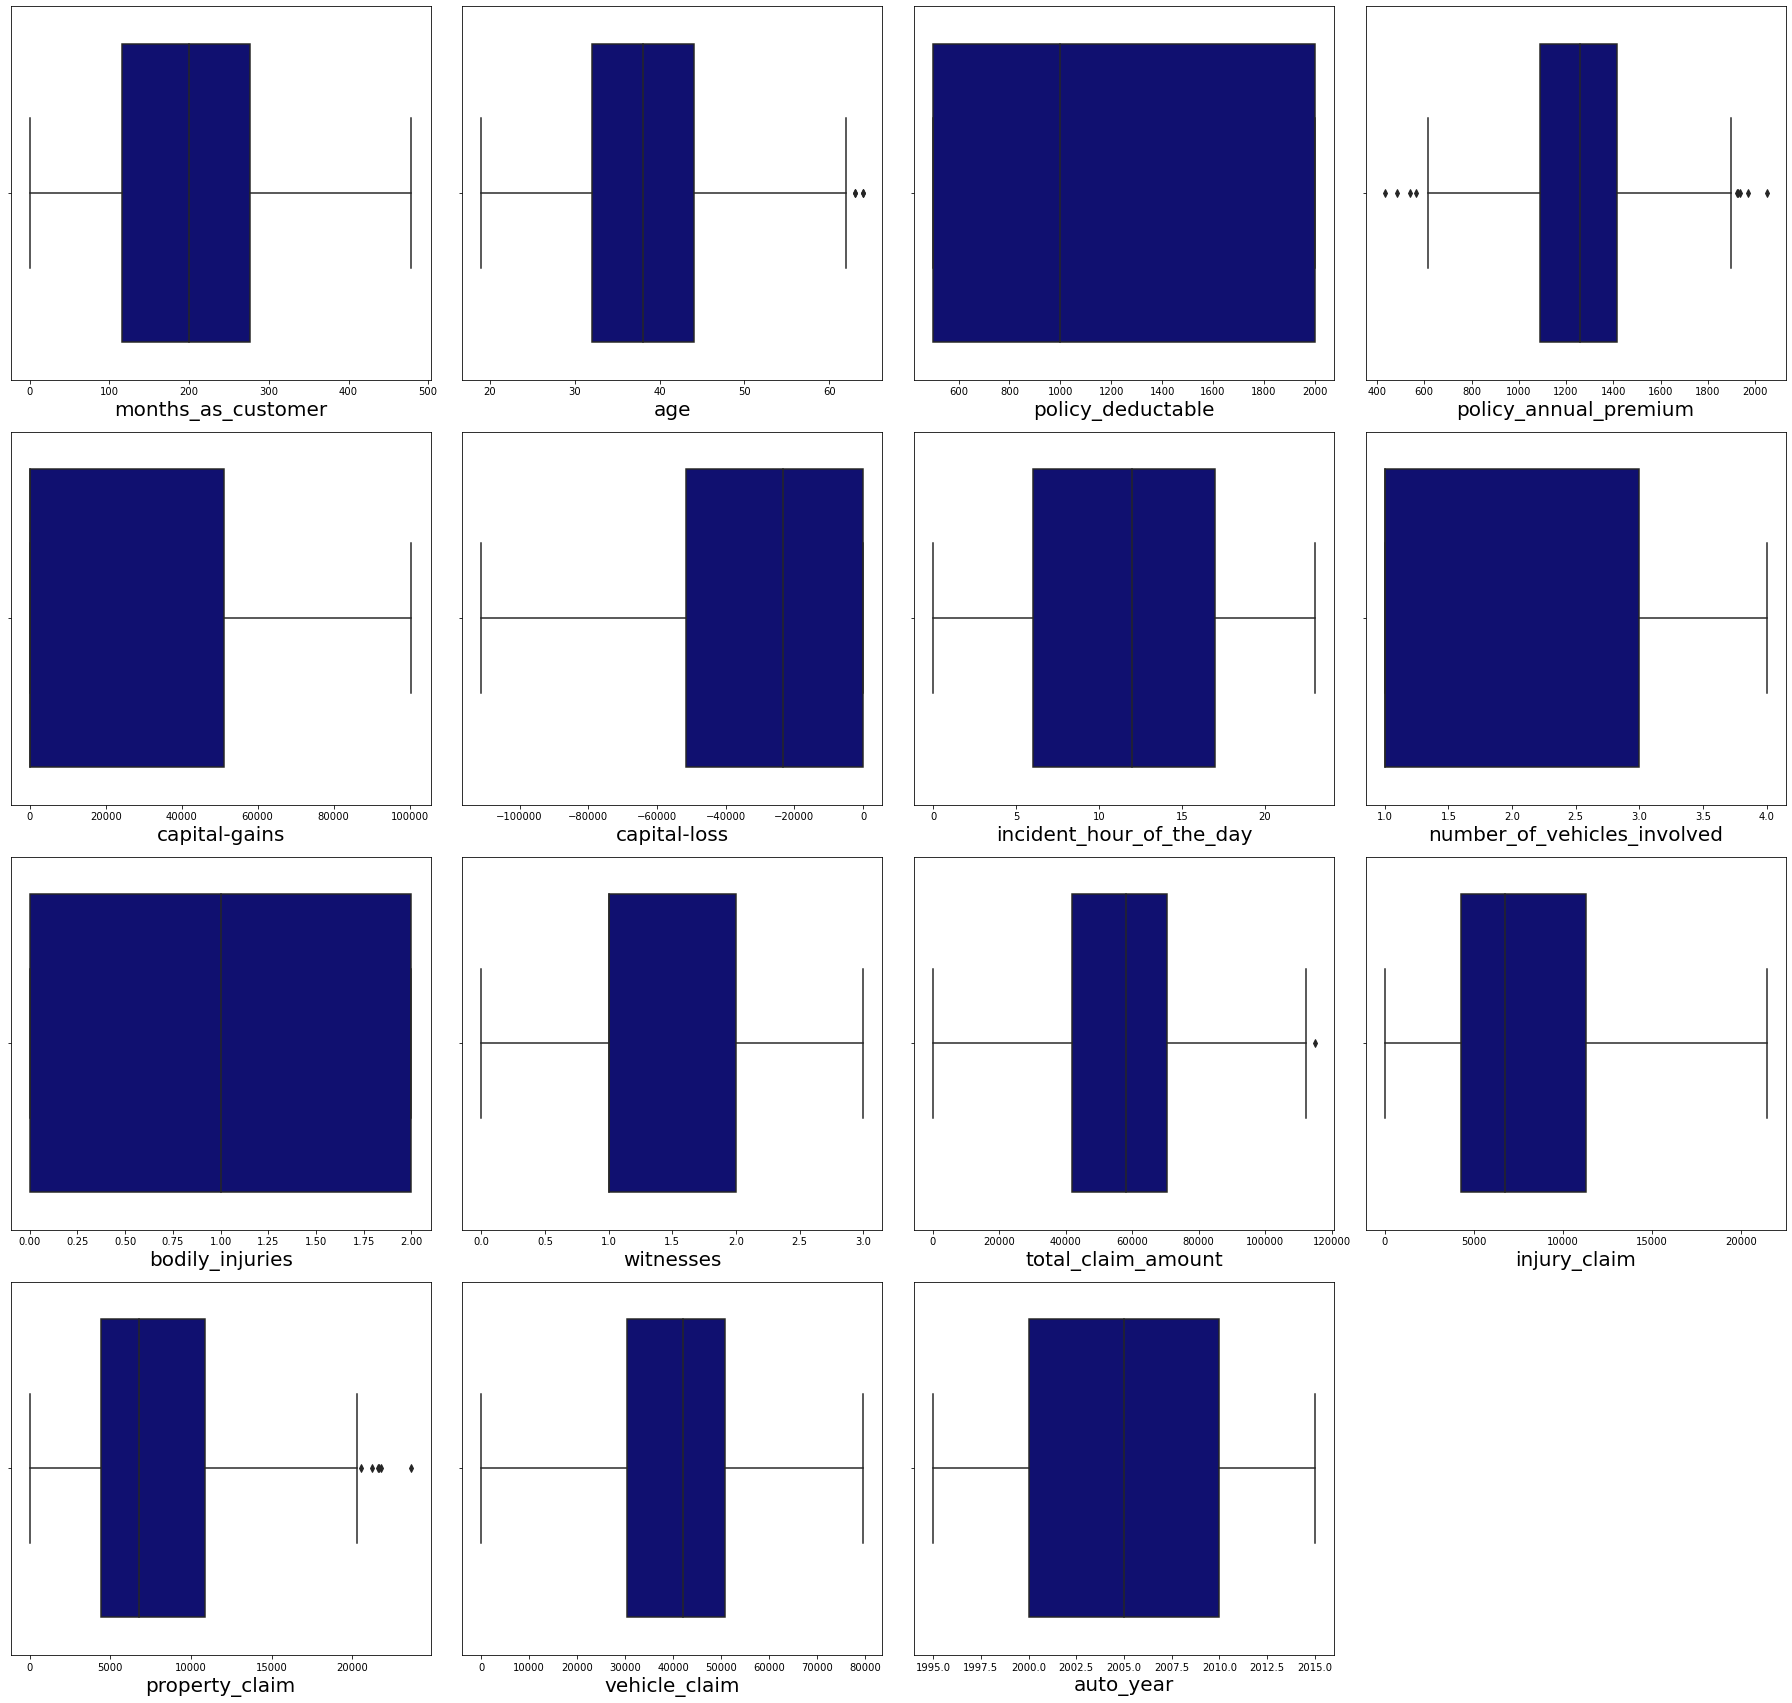

In [20]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in n:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="navy")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see outliers in age,policy_annual_premium,total_claim_amount,property_claim. Lets remove the same.

In [21]:
# Feature containing outliers
features = df[['age','policy_annual_premium','total_claim_amount','property_claim']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

age  policy_annual_premium  total_claim_amount  property_claim
0    0.990836               0.616705            0.714257        1.165505
1    0.334073               0.242521            1.807312        1.372696
2    1.088913               0.642233            0.686362        0.736072
3    0.224613               0.652886            0.403135        0.219722
4    0.552994               1.341980            1.753121        1.399654
..        ...                    ...                 ...             ...
995  0.103769               0.222884            1.305049        0.273817
996  0.224613               0.739141            2.111466        2.214794
997  0.541611               0.520739            0.558507        0.020826
998  2.523284               0.411866            0.219110        0.451976
999  2.304363               2.008710            1.807691        1.343664

[1000 rows x 4 columns]

In [22]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies  ... witnesses  \
0         craft-repair        sleeping  ...         2   
1    machine-op-inspct         reading  ...         0   
2                sales     board-games  ...         3   
3         armed-forces     board-games  ...         2   
4                sales     board-games  ...         1   
..                 ...             ...  ...       ...   
995       craft-repair       paintball  ...         1   
996     prof-specialty        sleeping  ...         3   
997       armed-forces  bungie-jumping  ...         3   
998  handlers-cleaners    base-jumping  ...         1   
999              sales        kayaking  ...         3   

     police_report_available  total_claim_amount injury_claim property_claim  \
0                        YES               71610         6510          13020   
1                         NO                5070          780            780   
2                         NO               34650         7700           3850   
3                         NO               63400         6340           6340   
4                         NO                6500         1300            650   
..                       ...                 ...          ...            ...   
995                       NO               87200        17440           8720   
996                       NO              108480        18080          18080   
997                      YES               67500         7500           7500   
998                      YES               46980         5220           5220   
999                       NO                5060          460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              Y  
1            3510    Mercedes       E400      2007              Y  
2           23100       Dodge        RAM      2007              N  
3           50720   Chevrolet      Tahoe      2014              Y  
4            4550      Accura        RSX      2009              N  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              N  
996         72320  Volkswagen     Passat      2015              N  
997         52500      Suburu    Impreza      1996   

In [23]:
# Shape of original dataset
df.shape

(1000, 34)

In [24]:
# Shape of new dataframe
df_new.shape

(996, 34)

# Percentage Data Loss

In [25]:
# Checking the the data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

0.4

# Encoder

In [43]:
from sklearn.preprocessing import LabelEncoder
#Encode=['policy_state', 'insured_sex', 'insured_education_level','insured_relationship', 'incident_type','collision_type','property_damage','police_report_available','fraud_reported','auto_model','auto_make','insured_occupation','insured_hobbies','incident_severity']

Encode=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i] =='object':
        Encode.append(i)

LE=LabelEncoder()
df_new[Encode]= df_new[Encode].apply(LE.fit_transform)

In [44]:
df_new

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  insured_sex  insured_education_level  \
0                  1406.91            1                        4   
1                  1197.22            1                        4   
2                  1413.14            0                        6   
3                  1415.74            0                        6   
4                  1583.91            1                        0   
..                     ...          ...                      ...   
995                1310.80            0                        5   
996                1436.79            0                        6   
997                1383.49            0                        5   
998                1356.92            1                        0   
999                 766.19            0                        0   

     insured_occupation  insured_hobbies  ...  witnesses  \
0                     2               17  ...          2   
1                     6               15  ...          0   
2                    11                2  ...          3   
3                     1                2  ...          2   
4                    11                2  ...          1   
..                  ...              ...  ...        ...   
995                   2               13  ...          1   
996                   9               17  ...          3   
997                   1                3  ...          3   
998                   5                0  ...          1   
999                  11               11  ...          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          1               71610          6510   
1                          0                5070           780   
2                          0               34650          7700   
3                          0               63400          6340   
4                          0                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        1               67500          7500   
998                        1               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
0             13020          52080         10           1       2004   
1               780           3510          8          12       2007   
2              3850          23100          4          30       2007   
3              6340          50720          3          34       2014   
4               650           4550          0          31       2009   
..              ...            ...        ...         ...        ...   
995            8720          61040          6           6       2006   
996           18080          72320         13          28       2015   
997            7500          52500         11          19       1996   
998            5220          

# Correlation:

In [28]:
df_new.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000118   
age                                    0.922092  1.000000     -0.015182   
policy_state                           0.000118 -0.015182      1.000000   
policy_deductable                      0.023512  0.026772      0.010740   
policy_annual_premium                 -0.003378  0.005890      0.014475   
insured_sex                            0.059002  0.072900     -0.019294   
insured_education_level               -0.000848  0.001485     -0.032551   
insured_occupation                     0.005365  0.014030     -0.031016   
insured_relationship                   0.071097  0.075940     -0.018855   
capital-gains                          0.007601 -0.006333      0.072552   
capital-loss                           0.020771  0.008192     -0.032268   
incident_type                         -0.017202 -0.025979      0.031769   
collision_type                        -0.072479 -0.075892      0.050953   
incident_hour_of_the_day               0.068962  0.085509      0.026464   
number_of_vehicles_involved            0.013609  0.021140     -0.043447   
property_damage                        0.002663 -0.005795     -0.009334   
bodily_injuries                       -0.011126 -0.017461      0.008992   
witnesses                              0.063530  0.056658      0.024809   
police_report_available               -0.018760 -0.018493      0.065957   
total_claim_amount                     0.064193  0.069989     -0.008498   
injury_claim                           0.066416  0.075480     -0.046398   
property_claim                         0.041157  0.064230      0.002678   
vehicle_claim                          0.062062  0.061949     -0.000560   
auto_make                              0.049222  0.032105      0.015848   
auto_model                             0.002908  0.016258     -0.024513   
auto_year                              0.001287  0.003268      0.002323   
fraud_reported                         0.020966  0.012408      0.028864   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.023512              -0.003378   
age                                   0.026772               0.005890   
policy_state                          0.010740               0.014475   
policy_deductable                     1.000000              -0.008445   
policy_annual_premium                -0.008445               1.000000   
insured_sex                          -0.011671               0.041830   
insured_education_level               0.014571              -0.021475   
insured_occupation                   -0.050024               0.030963   
insured_relationship                 -0.021763               0.006474   
capital-gains                         0.035950              -0.009757   
capital-loss                         -0.024018               0.029835   
incident_type                        -0.038696               0.049336   
collision_type                       -0.054153               0.034999   
incident_hour_of_the_day              0.059733              -0.003001   
number_of_vehicles_involved           0.051317              -0.044711   
property_damage                       0.014131               0.078922   
bodily_injuries                      -0.023384               0.025323   
witnesses                             0.069433               0.006365   
police_report_available               0.040969               0.029619   
total_claim_amount                    0.024621               0.003550   
injury_claim                          0.040337              -0.024031   
property_claim                        0.069537              -0.007964   
vehicle_claim                         0.006292               0.013198   
auto_make                            -0.034266               0.011595   
auto_model                           -0.003597              -0.034998   
auto_year                     

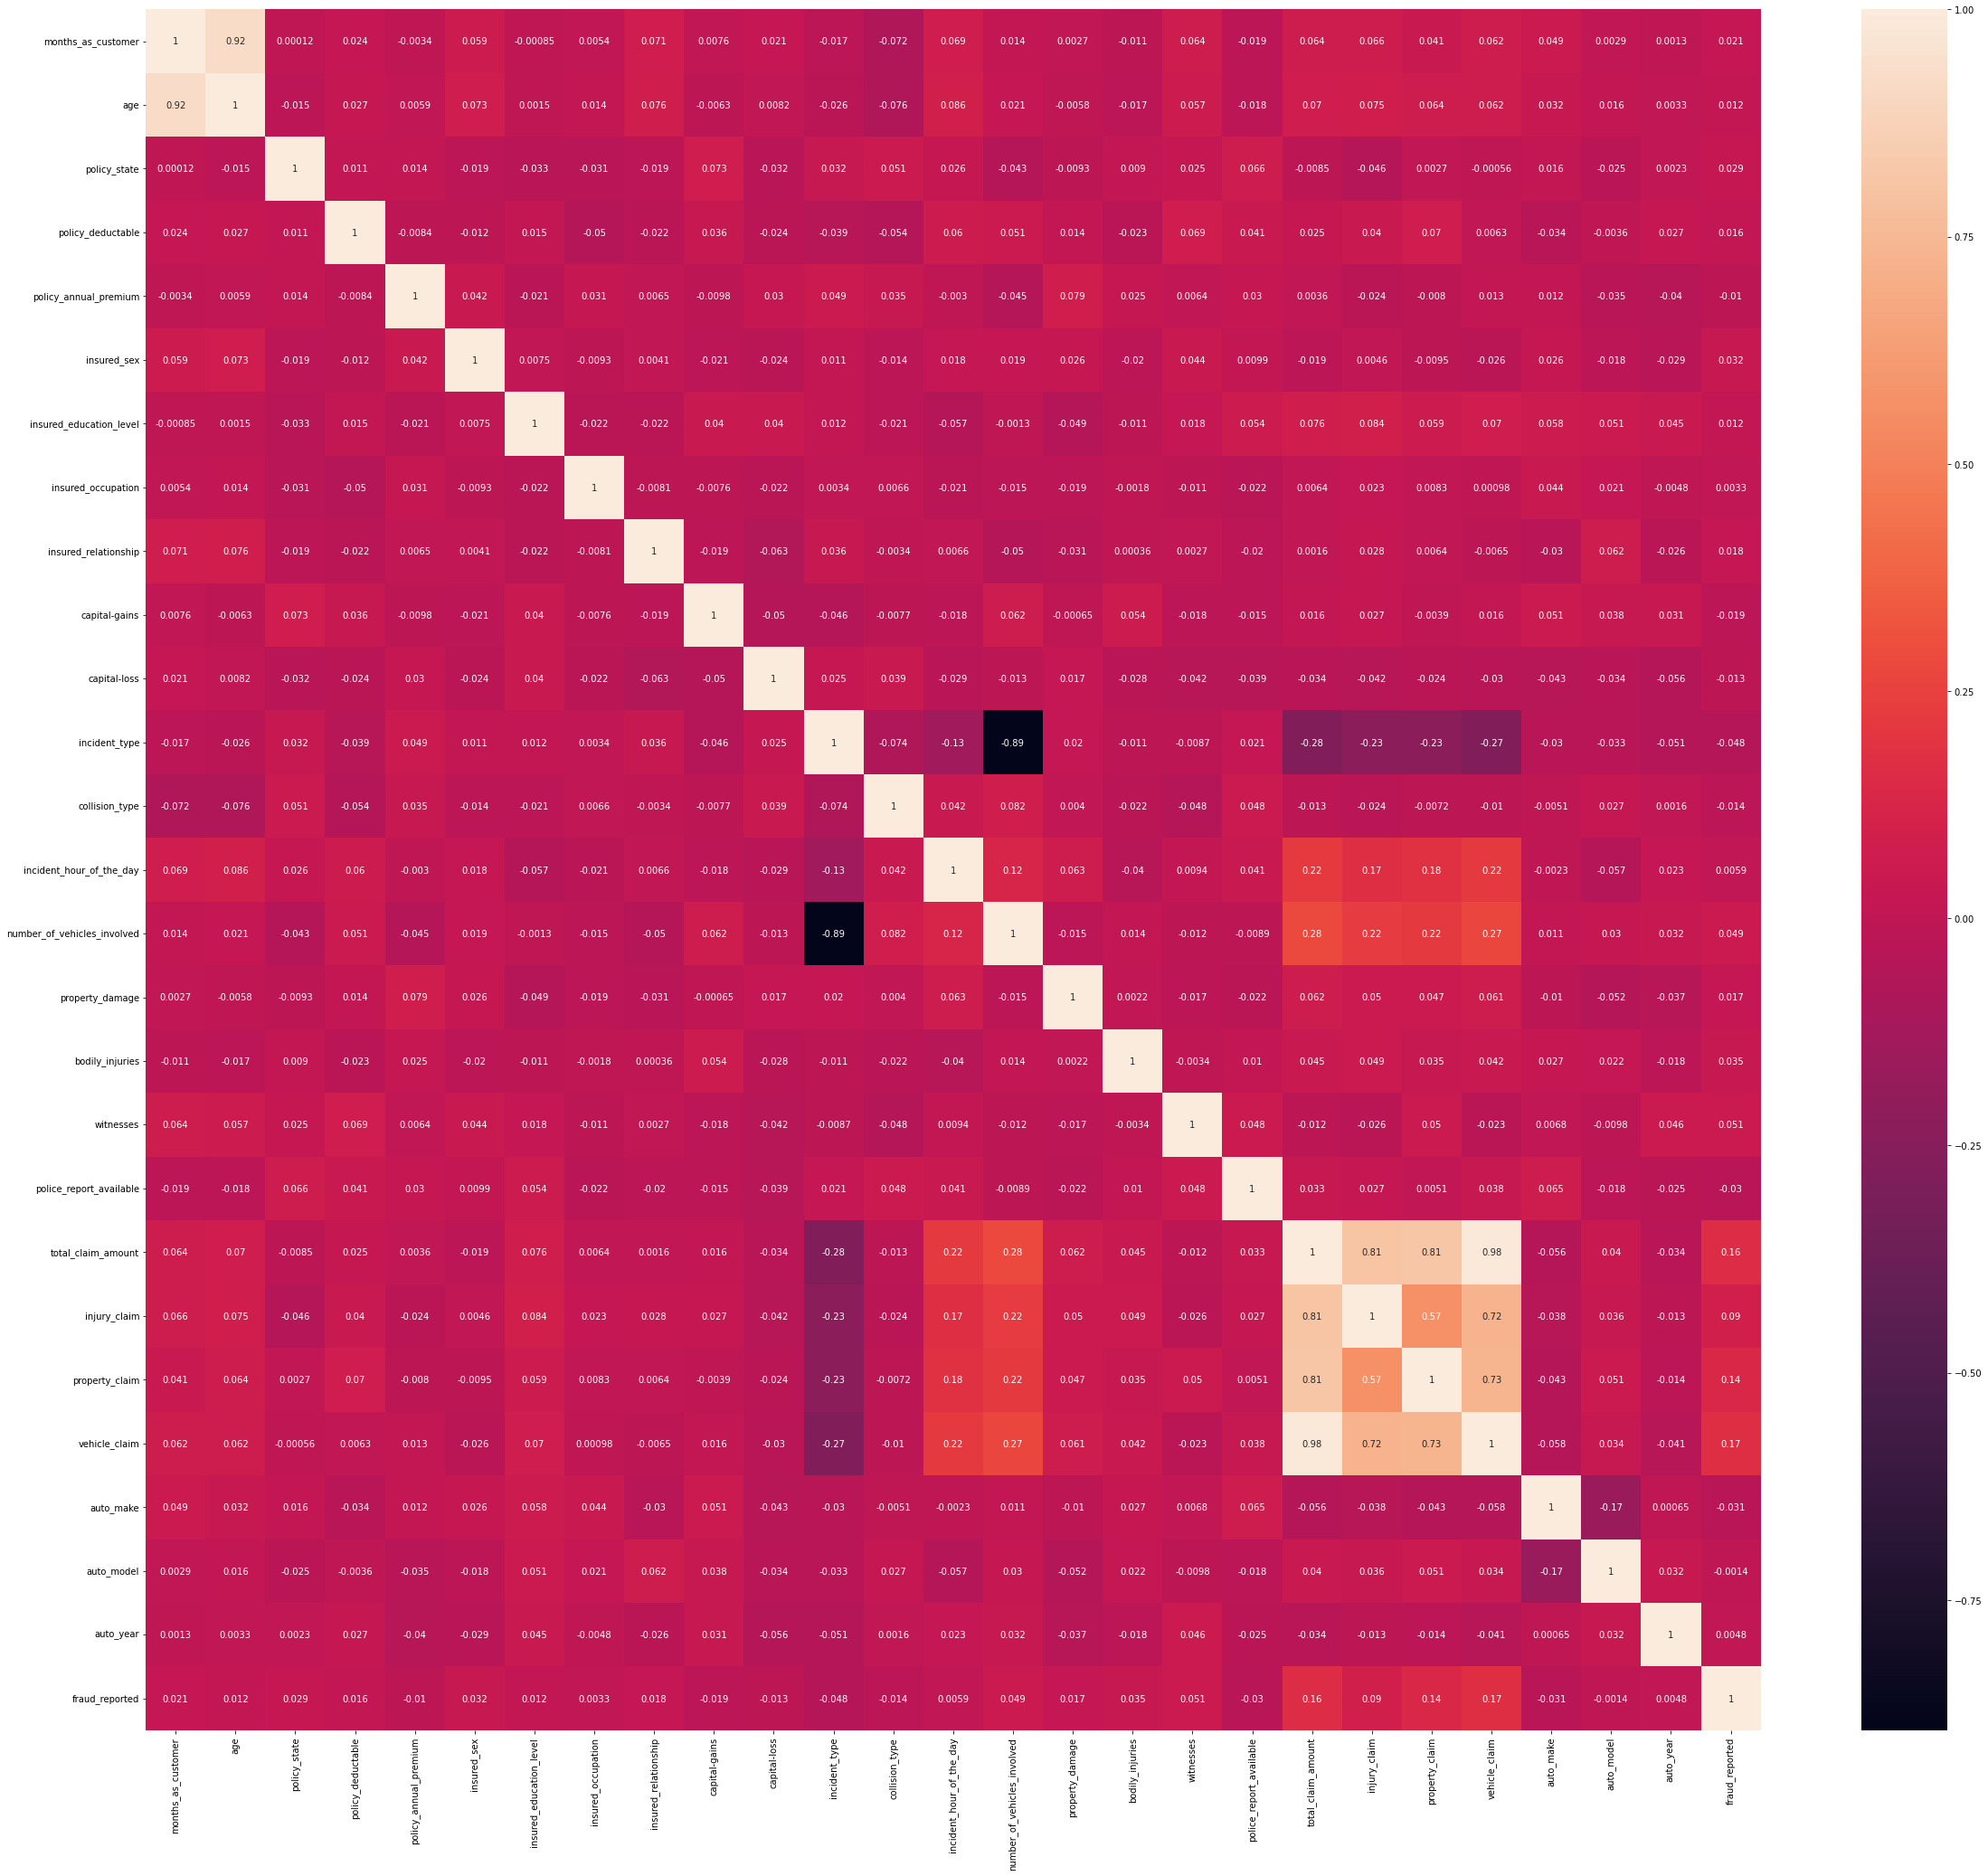

In [29]:
plt.figure(figsize=(40,35))
sns.heatmap(df_new.corr(), annot = True)
plt.yticks(rotation=0);

We can observe the most of the columns are highly correlated with each other which leads to multicollinearity.

# Skewness

In [30]:
df_new.describe()

months_as_customer         age  policy_state  policy_deductable  \
count          996.000000  996.000000    996.000000         996.000000   
mean           204.449799   38.980924      1.015060        1137.550201   
std            115.023399    9.140700      0.830798         612.397564   
min              0.000000   19.000000      0.000000         500.000000   
25%            116.000000   32.000000      0.000000         500.000000   
50%            200.000000   38.000000      1.000000        1000.000000   
75%            277.000000   44.250000      2.000000        2000.000000   
max            479.000000   64.000000      2.000000        2000.000000   

       policy_annual_premium  insured_sex  insured_education_level  \
count             996.000000   996.000000               996.000000   
mean             1257.616446     0.463855                 2.964859   
std               240.385312     0.498942                 1.950073   
min               538.170000     0.000000                 0.000000   
25%              1090.567500     0.000000                 1.000000   
50%              1257.595000     0.000000                 3.000000   
75%              1415.695000     1.000000                 5.000000   
max              1969.630000     1.000000                 6.000000   

       insured_occupation  insured_relationship  capital-gains  ...  \
count          996.000000            996.000000     996.000000  ...   
mean             6.667671              2.414659   25127.409639  ...   
std              4.017925              1.682229   27903.294266  ...   
min              0.000000              0.000000       0.000000  ...   
25%              3.000000              1.000000       0.000000  ...   
50%              7.000000              2.000000       0.000000  ...   
75%             10.000000              4.000000   51025.000000  ...   
max             13.000000              5.000000  100500.000000  ...   

        witnesses  police_report_available  total_claim_amount  injury_claim  \
count  996.000000               996.000000          996.000000    996.000000   
mean     1.481928                 0.313253        52735.100402   7427.680723   
std      1.110333                 0.464049        26373.980757   4879.556218   
min      0.000000                 0.000000          100.000000      0.000000   
25%      0.750000                 0.000000        41812.500000   4295.000000   
50%      1.000000                 0.000000        57935.000000   6770.000000   
75%      2.000000                 1.000000        70530.000000  11285.000000   
max      3.000000                 1.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim   auto_make  auto_model    auto_year  \
count      996.000000     996.000000  996.000000  996.000000   996.000000   
mean      7385.702811   37921.716867    6.545181   19.324297  2005.096386   
std       4799.806634   18874.919904    4.032153   11.146275     6.015954   
min          0.000000      70.000000    0.000000    0.000000  1995.000000   
25%       4445.000000   30292.500000    3.000000   10.000000  2000.000000   
50%       6745.000000   42100.000000    7.000000   20.000000  2005.000000   
75%      10865.000000   50762.500000   10.000000   29.000000  2010.000000   
max      21810.000000   79560.000000   13.000000   38.000000  2015.000000   

       fraud_reported  
count      996.000000  
mean         0.246988  
std          0.431476  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 27 columns]

In [31]:
df_new.skew()

months_as_customer             0.359605
age                            0.474526
policy_state                  -0.028155
policy_deductable              0.473229
policy_annual_premium          0.032042
insured_sex                    0.145176
insured_education_level        0.001349
insured_occupation            -0.063714
insured_relationship           0.076423
capital-gains                  0.478850
capital-loss                  -0.393015
incident_type                  0.102917
collision_type                -0.033826
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
property_damage                0.857547
bodily_injuries                0.011117
witnesses                      0.025758
police_report_available        0.806478
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_make                     -0.018165
auto_model                    -0.081747


We can see skewnwss in the data.

In [45]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df_new.drop(['fraud_reported'], axis=1)
y=df_new['fraud_reported']
df2=pd.DataFrame(x,columns=x.columns)

x=power_transform(x, method='yeo-johnson')

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.0487108 ,  1.00525233,  1.14546584, ...,  0.85985412,
        -1.8069241 , -0.19666454],
       [ 0.30009269,  0.42687176,  0.06961066, ...,  0.41915429,
        -0.5860917 ,  0.3034515 ],
       [-0.51736976, -1.14309105,  1.14546584, ..., -0.55533384,
         0.94360332,  0.3034515 ],
       ...,
       [-0.55591931, -0.47514593,  1.14546584, ...,  1.07195552,
         0.04498888, -1.49484302],
       [ 1.91254016,  2.13136939, -1.26061966, ..., -1.44208021,
        -1.30447608, -1.17507071],
       [ 1.89994837,  1.98582453,  1.14546584, ...,  0.41915429,
        -0.5860917 ,  0.3034515 ]])

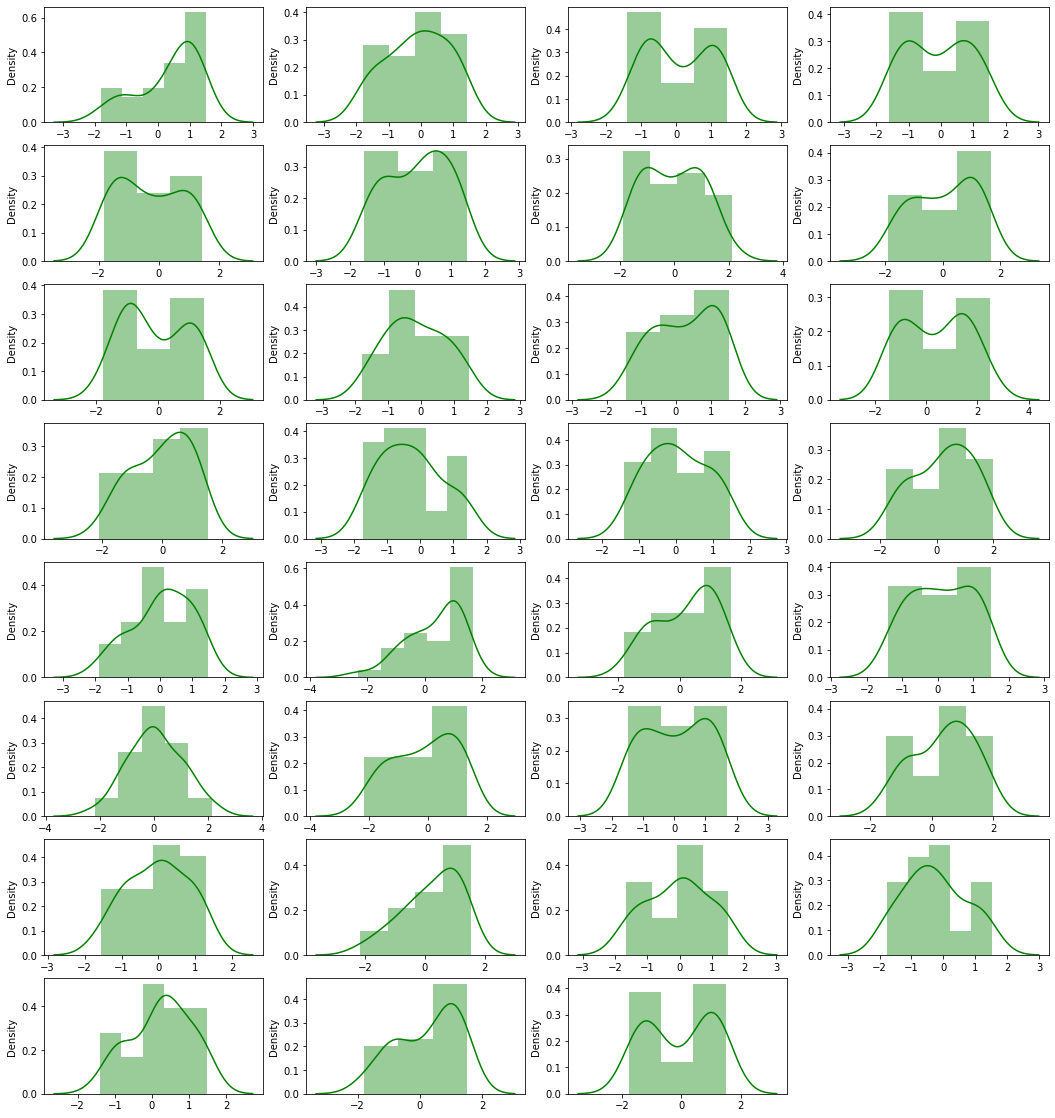

In [47]:
plt.figure(figsize=(18,20))
for i in enumerate(pd.DataFrame(x)):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(pd.DataFrame(x[i[1]]),color='g')

We can notice the skewwness is removed now.

# VIF calculation

In [48]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()

    VIF Factor                     features
0     4.689026           months_as_customer
1     4.701222                          age
2     1.031041                 policy_state
3     1.035628            policy_deductable
4     1.036363        policy_annual_premium
5     1.027308                  insured_sex
6     1.040196      insured_education_level
7     1.015725           insured_occupation
8     1.052248              insured_hobbies
9     1.036259         insured_relationship
10    1.033429                capital-gains
11    1.038762                 capital-loss
12   10.322326                incident_type
13    1.042296               collision_type
14    1.186211            incident_severity
15    1.096654        authorities_contacted
16    1.037533               incident_state
17    1.024073                incident_city
18    1.094714     incident_hour_of_the_day
19   10.507848  number_of_vehicles_involved
20    1.031155              property_damage
21    1.021416              bodi

We can see vehicle_claim,total_claim_amount,injury_claim,property_claim,number_of_vehicles_involved,incident_type has VIF values more than 10.

In [51]:
#dropping total_claim_amount
df2.drop("total_claim_amount",axis=1,inplace=True)
x=df2
x=power_transform(x, method='yeo-johnson')
x=sc.fit_transform(x)

In [52]:
vif_calc()

    VIF Factor                     features
0     4.688003           months_as_customer
1     4.694026                          age
2     1.030997                 policy_state
3     1.035221            policy_deductable
4     1.029471        policy_annual_premium
5     1.025817                  insured_sex
6     1.040130      insured_education_level
7     1.013986           insured_occupation
8     1.048871              insured_hobbies
9     1.036250         insured_relationship
10    1.033398                capital-gains
11    1.038123                 capital-loss
12   10.317283                incident_type
13    1.042215               collision_type
14    1.174057            incident_severity
15    1.079176        authorities_contacted
16    1.035022               incident_state
17    1.021918                incident_city
18    1.090123     incident_hour_of_the_day
19   10.458695  number_of_vehicles_involved
20    1.029094              property_damage
21    1.019646              bodi

We can still see high value in number_of_vehicles_involved,incident_type has VIF values more than 10.

In [53]:
#dropping total_claim_amount
df2.drop("number_of_vehicles_involved",axis=1,inplace=True)
x=df2
x=power_transform(x, method='yeo-johnson')
x=sc.fit_transform(x)

In [54]:
vif_calc()

    VIF Factor                  features
0     4.687802        months_as_customer
1     4.693828                       age
2     1.030077              policy_state
3     1.034400         policy_deductable
4     1.029434     policy_annual_premium
5     1.021813               insured_sex
6     1.039734   insured_education_level
7     1.013333        insured_occupation
8     1.047233           insured_hobbies
9     1.034281      insured_relationship
10    1.032610             capital-gains
11    1.037628              capital-loss
12    1.122452             incident_type
13    1.041538            collision_type
14    1.172643         incident_severity
15    1.078862     authorities_contacted
16    1.034742            incident_state
17    1.020825             incident_city
18    1.090119  incident_hour_of_the_day
19    1.029002           property_damage
20    1.019249           bodily_injuries
21    1.032446                 witnesses
22    1.035386   police_report_available
23    2.492768  

Now all values are less than 10, so there is no multicolllinearity. Let's check if the data is balanced.

In [55]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

We can clearly see the data is not balanced,let's apply SMOTE

In [56]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

Now thw data is balanced, we can proceed with the model.

# Finding the best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9155555555555556  on Random_state  73


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.7444444444444445
[[167  65]
 [ 50 168]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       232
           1       0.72      0.77      0.75       218

    accuracy                           0.74       450
   macro avg       0.75      0.75      0.74       450
weighted avg       0.75      0.74      0.74       450

Cross Validation Score: 0.744
Difference Between Accuracy Score and CrossValidation Score: 0.0004444444444444695


Accuracy score: of SVC()
0.8688888888888889
[[191  41]
 [ 18 200]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       232
           1       0.83      0.92      0.87       218

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450

Cross Validation Score: 0.8586666666666668
Difference Between Accuracy Score and C

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 98}
0.8866666666666667


In [63]:
rf1=RandomForestClassifier(max_features ='log2', max_depth= 16,criterion= 'gini',n_estimators=98)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=98)
0.9177777777777778
[[210  22]
 [ 15 203]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       232
           1       0.90      0.93      0.92       218

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



# ROC AUC

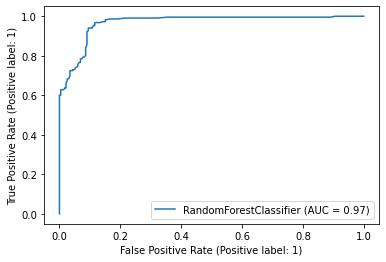

In [64]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

In [65]:
# Saving the model using .pkl
import pickle
filename='Claim.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [68]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

original  Predicted
61          1          1
440         1          1
351         1          1
291         0          0
363         1          1